<a href="https://colab.research.google.com/github/ramansandhu17/Airbnb_Analysis/blob/main/price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

price_df=pd.read_csv('NRSairbnb_bookings.csv')
price_df.head()

price_df["Month"]=pd.to_datetime(price_df["Date"]).dt.month
price_df["Year"]=pd.to_datetime(price_df["Date"]).dt.year

price_trend=price_df.groupby(["Month","Year"])["PricePerNight"].mean().reset_index()

print(price_trend.head())

   Month  Year  PricePerNight
0      1  2025     138.812903
1      2  2025     176.200000
2      8  2024     139.703704
3      9  2024     144.540000
4     10  2024     134.696774


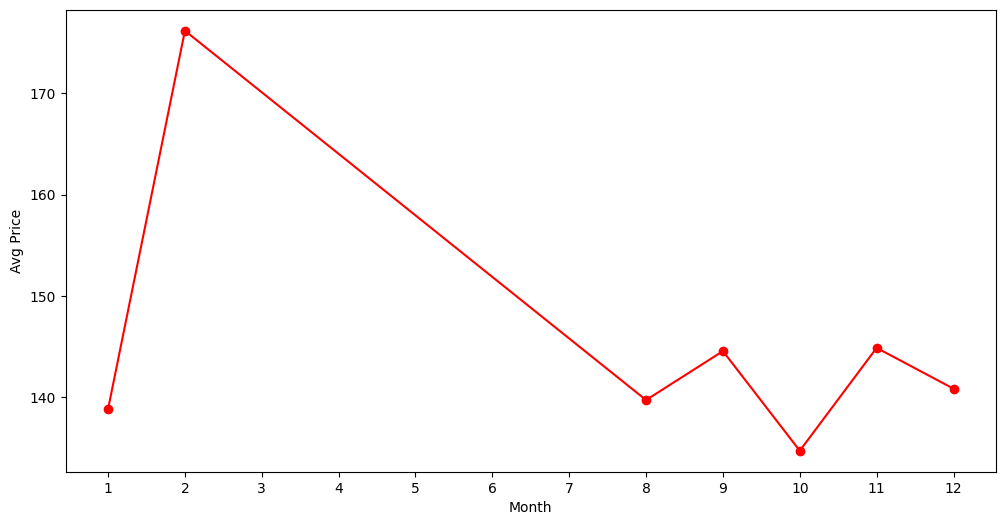

In [2]:
#plot this in visualization for better visibility

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(price_trend["Month"],price_trend["PricePerNight"].groupby(price_trend["Month"]).mean(),marker="o",color='r')

plt.xticks(range(1,13))

plt.xlabel("Month")
plt.ylabel("Avg Price")

plt.show()

   Month  Year PropertyID  PricePerNight
0      1  2025       P001     134.516129
1      1  2025       P002     137.225806
2      1  2025       P003     140.677419
3      1  2025       P004     144.870968
4      1  2025       P005     136.774194


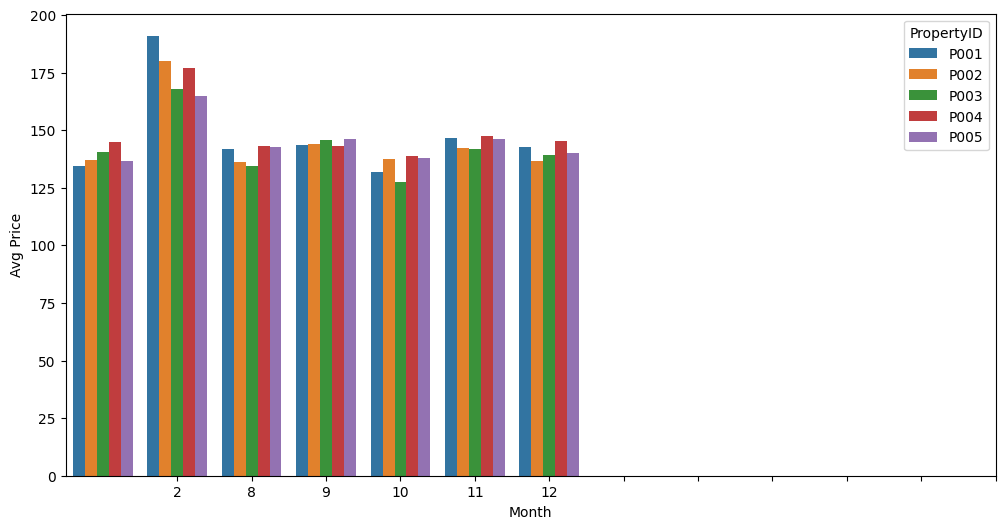

In [4]:
#plot this in visualization for better visibility

#lets do property wise visualization with seaborn
import matplotlib.pyplot as plt
import seaborn as sns

price_property_df=price_df.groupby(["Month","Year","PropertyID"])["PricePerNight"].mean().reset_index()

print(price_property_df.head())
plt.figure(figsize=(12,6))

sns.barplot(data=price_property_df,x="Month",y="PricePerNight",hue="PropertyID")

plt.xticks(range(1,13))

plt.xlabel("Month")
plt.ylabel("Avg Price")

plt.show()

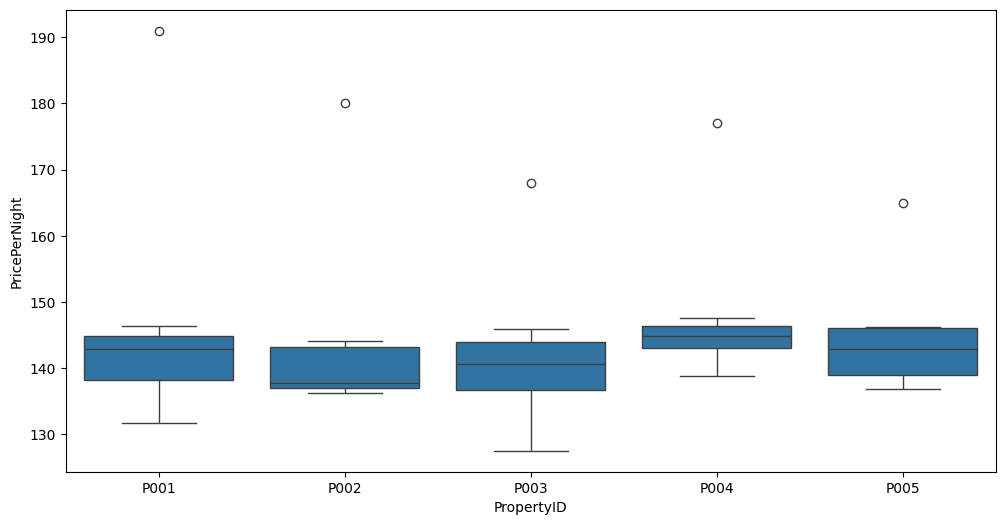

In [6]:
#Property wise Price distribution (Box plot)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

sns.boxplot(data=price_property_df,x="PropertyID",y="PricePerNight")

plt.show()

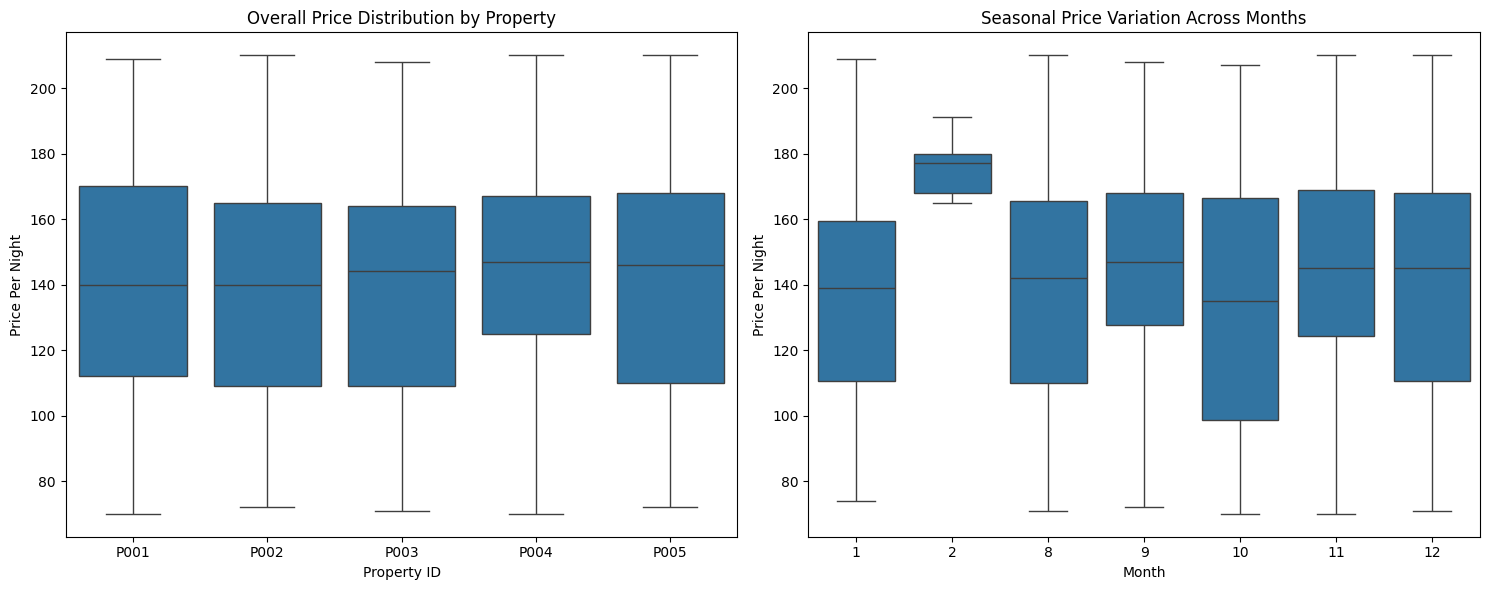

In [8]:
#Compare overall and Property level price distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box plot for overall price distribution
sns.boxplot(data=price_df, x="PropertyID", y="PricePerNight", ax=axes[0])
axes[0].set_title("Overall Price Distribution by Property")
axes[0].set_xlabel("Property ID")
axes[0].set_ylabel("Price Per Night")

# Box plot for price distribution across all months
sns.boxplot(data=price_df, x="Month", y="PricePerNight", ax=axes[1])
axes[1].set_title("Seasonal Price Variation Across Months")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Price Per Night")

# Show the plots
plt.tight_layout()
plt.show()


Observatons: Pricing boxes are tall for boxplot 1, meaning the pricing vary and range is big, with some nights cheaper and some expensive, No unexpected hikes

Observations for Boxplot 2: In february the pricing increased and median is higher, the pricing dropped in october and has a tall box maybe the owner decreased manually due to seasonal demands,
